In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
home_ownership_rate = pd.read_csv("Home Ownership Rate (Hamilton, OH) - Home Ownership Rate.csv")
us_census = pd.read_csv("US Census (Hamilton, OH) - Sheet1.csv")
home_value_forecast = pd.read_csv("Home Value Forecast - Sheet1.csv")
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")
zestimate = pd.read_csv("Zillow Housing Estimate Index - Sheet1.csv")
wood_prices = pd.read_csv("wood_prices_dataset.csv")


In [13]:
home_ownership_rate = home_ownership_rate.rename(columns={"DATE":"Date", "HOWNRATEACS039061":"Homeownership Rate"})
home_ownership_rate.head()

,Date,Homeownership Rate
0,1/1/2009,67.089647
1,1/1/2010,65.820411
2,1/1/2011,65.362558
3,1/1/2012,64.354125
4,1/1/2013,63.293043


In [14]:
x_axis = np.arange(len(home_ownership_rate))
tick_locations = [value for value in x_axis]

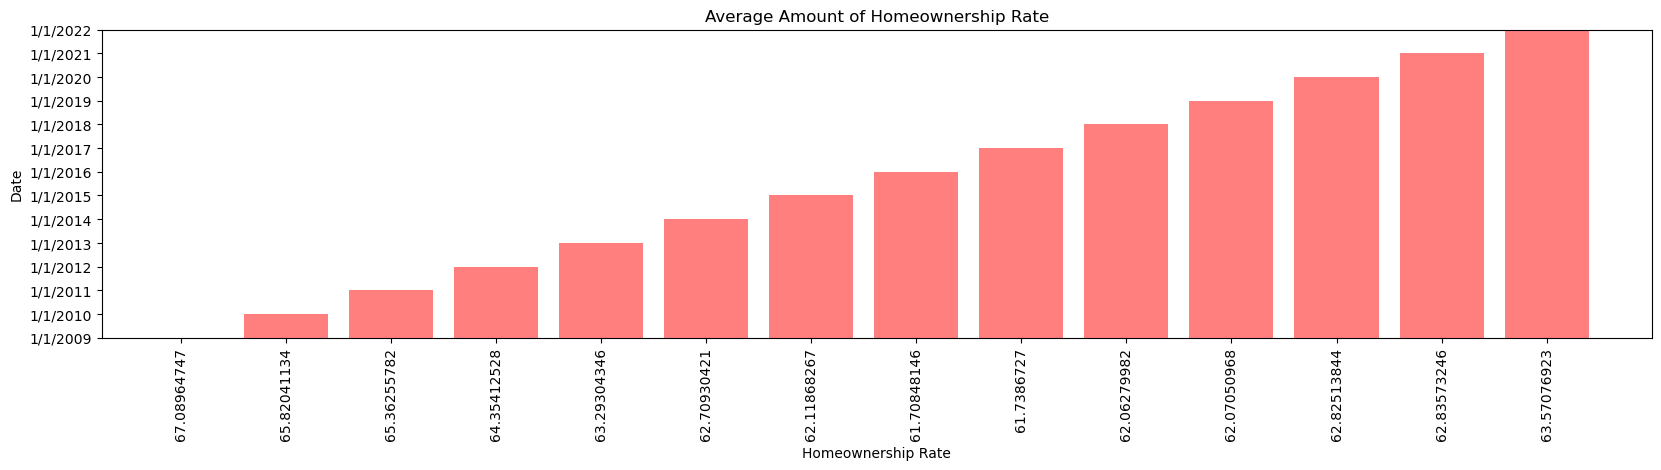

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, home_ownership_rate["Date"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, home_ownership_rate["Homeownership Rate"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(home_ownership_rate["Date"]))

# Set a Title and labels
plt.title("Average Amount of Homeownership Rate")
plt.xlabel("Homeownership Rate")
plt.ylabel("Date")
plt.show()

# Save our graph and show the grap
plt.tight_layout()
plt.show()

In [6]:
# This shows the population for Hamilton county
us_census_transposed = us_census.set_index("Fact").transpose()

# x_axis = np.arange(len(us_census))
# plt.bar(x_axis, us_census["Hamilton County, Ohio"], color='r', alpha=0.5, align="edge")
# plt.show()

display(us_census_transposed) 
# plt.plot(us_census_transposed['Fact'], us_census_transposed['Hamilton County, Ohio'])
# plt.show()

Fact,"Population estimates, July 1, 2023, (V2023)","Population Estimates, July 1, 2022, (V2022)","Population estimates base, April 1, 2020, (V2023)","Population estimates base, April 1, 2020, (V2022)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2022, (V2022)","Population, Census, April 1, 2020","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent",...,"Women-owned employer firms, Reference year 2017","Minority-owned employer firms, Reference year 2017","Nonminority-owned employer firms, Reference year 2017","Veteran-owned employer firms, Reference year 2017","Nonveteran-owned employer firms, Reference year 2017","Population per square mile, 2020","Population per square mile, 2010","Land area in square miles, 2020","Land area in square miles, 2010",FIPS Code
"Hamilton County, Ohio",NaN,"825,037",NaN,"830,625",NaN,-0.70%,"830,639","802,374",6.10%,22.60%,...,"2,735","1,150","11,949",846,"12,077","2,048.90","1,976.70",405.41,405.91,"""39061"""


In [ ]:
# plt.plot(us_census_transposed['Population Estimates, July 1, 2022, (V2022)'], us_census_transposed['Hamilton County, Ohio'])
# plt.show()

In [7]:
#display(home_value_forecast) # A month-ahead, quarter-ahead and year-ahead forecast of the Zillow Home Value Index (ZHVI)
home_value_forecast_dropped = home_value_forecast.dropna()

display(home_value_forecast_dropped)

,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,12/31/2023,2/29/2024,11/30/2024
1,394913,1,"New York, NY",msa,NY,11/30/2023,0.1,-0.5,-2.9
2,753899,2,"Los Angeles, CA",msa,CA,11/30/2023,0.3,-1.0,-2.2
3,394463,3,"Chicago, IL",msa,IL,11/30/2023,0.1,-0.3,-2.2
4,394514,4,"Dallas, TX",msa,TX,11/30/2023,-0.2,-0.8,-0.8
5,394692,5,"Houston, TX",msa,TX,11/30/2023,-0.3,-1.1,-2.0
...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,11/30/2023,-1.6,-3.9,-9.5
891,394743,936,"Ketchikan, AK",msa,AK,11/30/2023,-0.5,-1.0,-3.8
892,753874,937,"Craig, CO",msa,CO,11/30/2023,0.0,-0.3,1.0
893,395188,938,"Vernon, TX",msa,TX,11/30/2023,-1.3,-2.8,-5.0


In [8]:
home_value_forecast_dropped_columns = home_value_forecast_dropped.drop(columns=['RegionID', 'SizeRank', "RegionType", "StateName", "BaseDate"])
display(home_value_forecast_dropped_columns)

,RegionName,12/31/2023,2/29/2024,11/30/2024
1,"New York, NY",0.1,-0.5,-2.9
2,"Los Angeles, CA",0.3,-1.0,-2.2
3,"Chicago, IL",0.1,-0.3,-2.2
4,"Dallas, TX",-0.2,-0.8,-0.8
5,"Houston, TX",-0.3,-1.1,-2.0
...,...,...,...,...
890,"Zapata, TX",-1.6,-3.9,-9.5
891,"Ketchikan, AK",-0.5,-1.0,-3.8
892,"Craig, CO",0.0,-0.3,1.0
893,"Vernon, TX",-1.3,-2.8,-5.0


<Axes: >

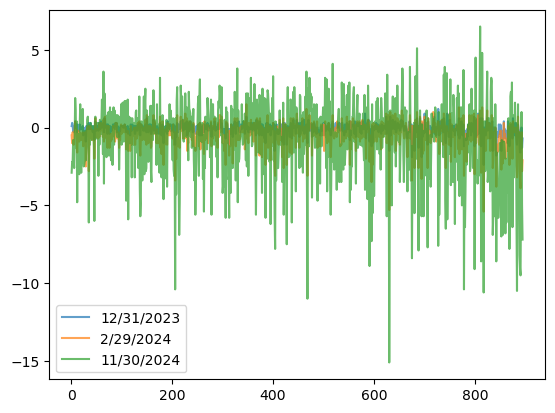

In [9]:
home_value_forecast_dropped_columns.plot(alpha=0.7)

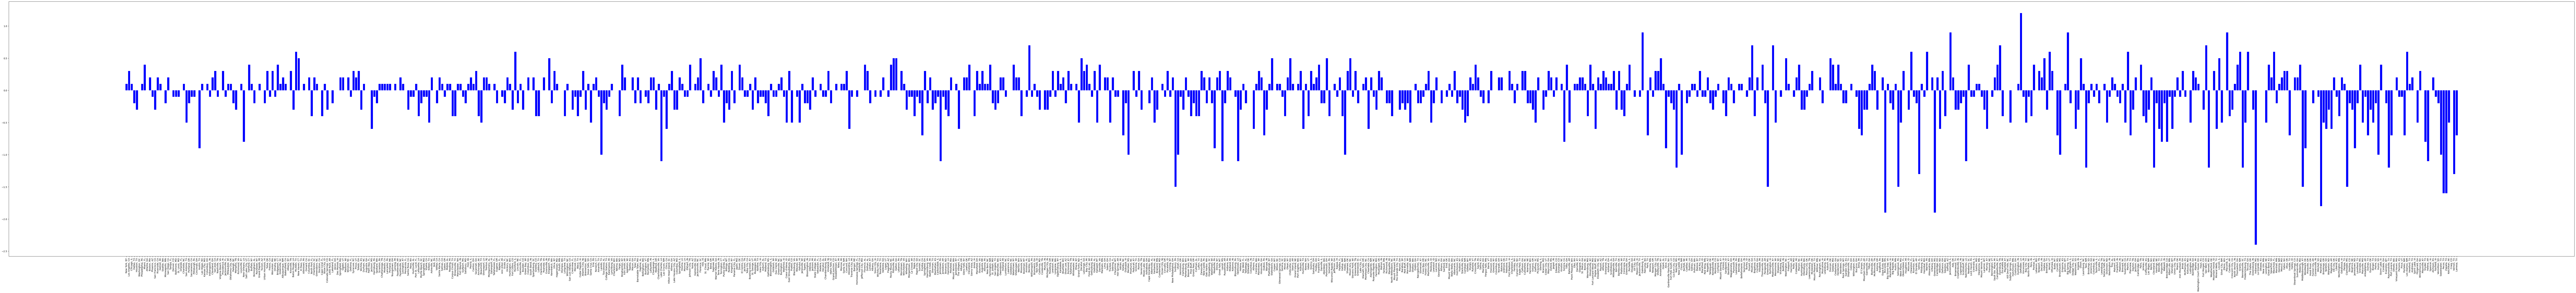

In [10]:
hvf_dropped_columns_month = home_value_forecast_dropped_columns.drop(columns=['2/29/2024', '11/30/2024'])
# display(hvf_dropped_columns_month)

plt.subplots(figsize=(200,20))

x_axis = np.arange(len(hvf_dropped_columns_month['12/31/2023']))
plt.bar(x_axis, hvf_dropped_columns_month['12/31/2023'], color="b", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, hvf_dropped_columns_month['RegionName'], rotation="vertical")



# tick_locations = [value+0.4 for value in x_axis]


plt.show()

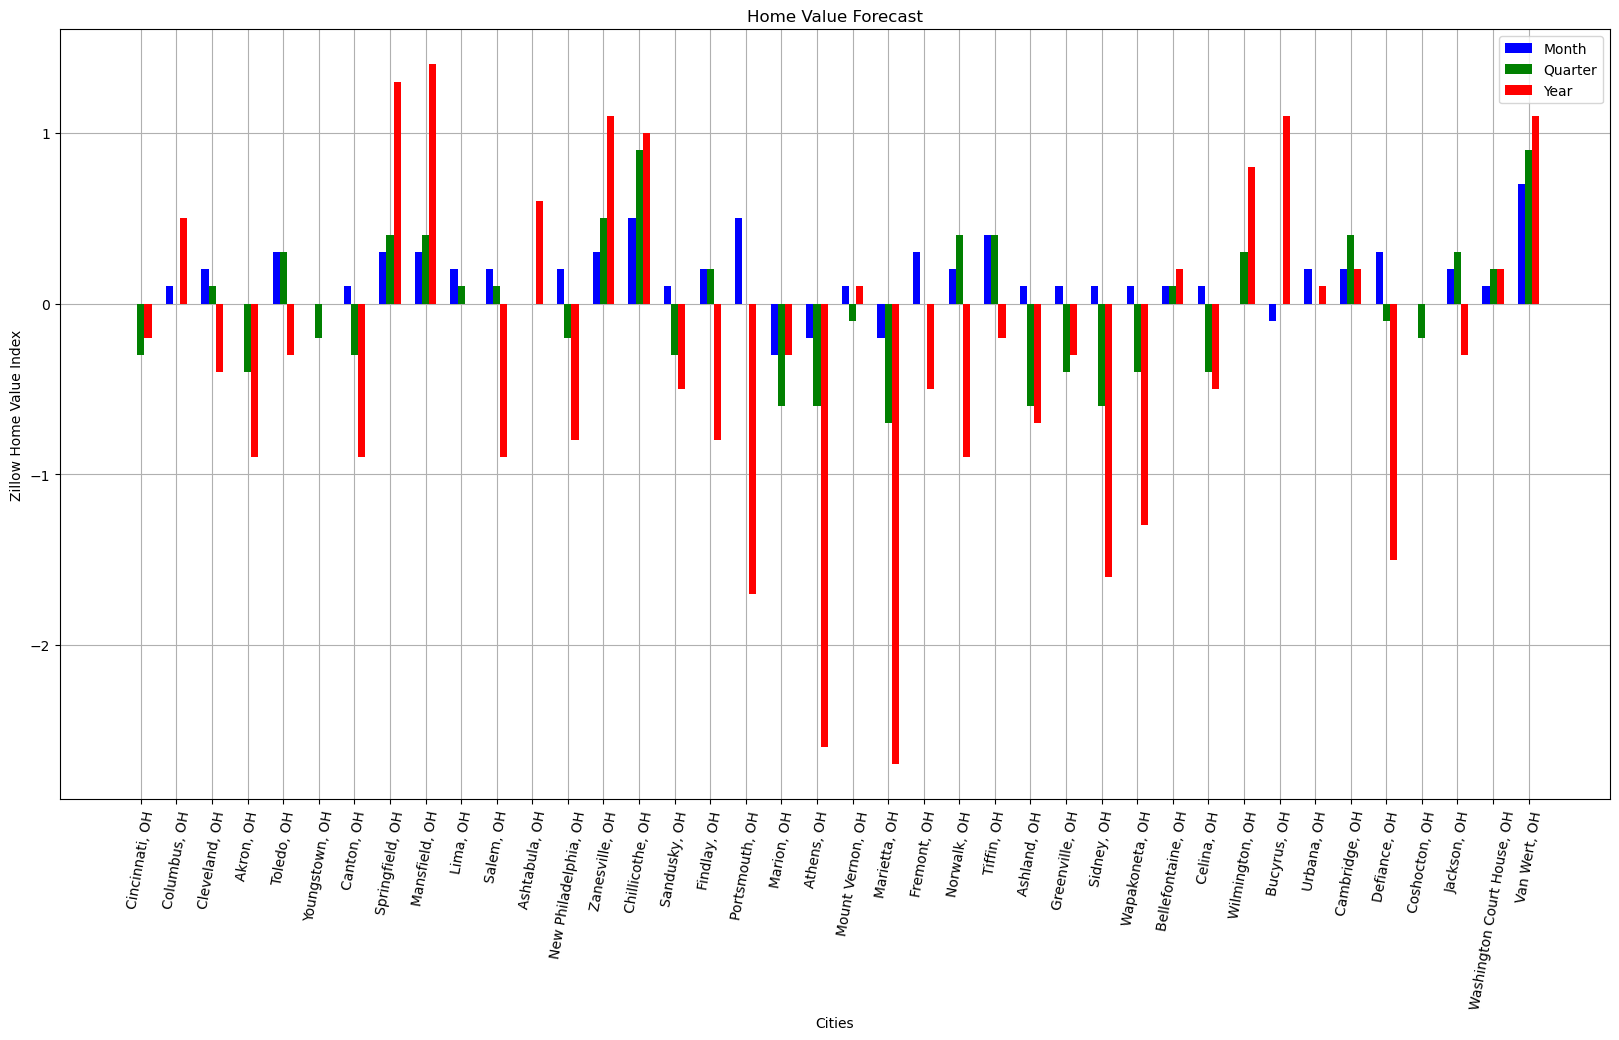

In [11]:
home_value_forecast_dropped_columns['RegionName'] = home_value_forecast_dropped_columns['RegionName'].astype(str)
# hvf_oh = home_value_forecast_dropped_columns.loc[home_value_forecast_dropped_columns['RegionName'] == ", OH"]
# hvf_oh = home_value_forecast_dropped_columns.loc[home_value_forecast_dropped_columns['RegionName'].isin(['OH'])]
hvf_oh = home_value_forecast_dropped_columns[home_value_forecast_dropped_columns['RegionName'].str.endswith('OH')]


# display(hvf_oh)

# print(home_value_forecast_dropped_columns['RegionName'].unique())
# home_value_forecast_dropped_columns.dtypes


plt.subplots(figsize=(20,10))

x_axis = np.arange(len(hvf_oh['12/31/2023']))
plt.bar(x_axis-0.2, hvf_oh['12/31/2023'], color="b", align="center", width=0.2, zorder = 3, label="Month")
plt.bar(x_axis, hvf_oh['2/29/2024'], color="g", align="center", width=0.2, zorder = 3, label="Quarter")
plt.bar(x_axis+0.2, hvf_oh['11/30/2024'], color="r", align="center", width=0.2, zorder = 3, label="Year")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, hvf_oh['RegionName'], rotation=80)

plt.grid(zorder=0)

plt.title("Home Value Forecast")
plt.xlabel("Cities")
plt.ylabel("Zillow Home Value Index")
plt.legend(loc="best")


plt.show()


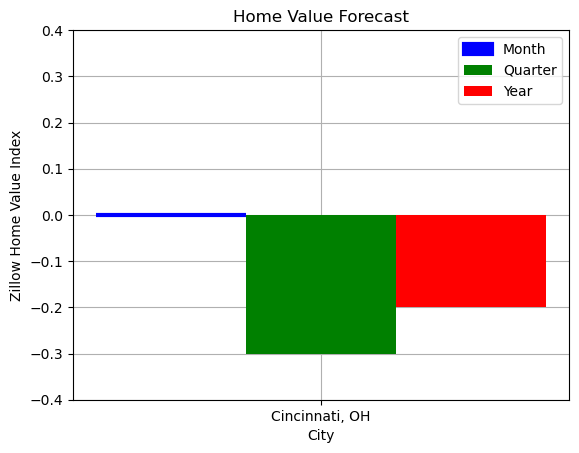

In [12]:
hvf_cincinnati = hvf_oh.loc[hvf_oh['RegionName'] == "Cincinnati, OH"]
# display(hvf_cincinnati)

x_axis = np.arange(len(hvf_cincinnati['12/31/2023']))
plt.bar(x_axis-0.2, hvf_cincinnati['12/31/2023'], color="b", edgecolor='b', linewidth=3, align="center", width=0.2, zorder = 3, label="Month")
plt.bar(x_axis, hvf_cincinnati['2/29/2024'], color="g", align="center", width=0.2, zorder = 3, label="Quarter")
plt.bar(x_axis+0.2, hvf_cincinnati['11/30/2024'], color="r", align="center", width=0.2, zorder = 3, label="Year")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, hvf_cincinnati['RegionName'], rotation='horizontal')

plt.grid(zorder=0)

plt.title("Home Value Forecast")
plt.xlabel("City")
plt.ylabel("Zillow Home Value Index")
plt.legend(loc="best")

plt.ylim(-0.40, max(hvf_cincinnati['12/31/2023'])+.40)


plt.show()

In [16]:
display(metro_sales_count.head()) # The estimated number of unique properties that sold during the month

,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,102001,0,United States,country,NaN,205206,238071,264215,290180,304596,...,236545,324071,299951,360423,381898,327706.0,356022.0,307974.0,291856.0,256938
1,394913,1,"New York, NY",msa,NY,8591,8967,9977,10232,10854,...,8915,11164,10446,12425,14692,13076.0,15184.0,12678.0,12449.0,10864
2,753899,2,"Los Angeles, CA",msa,CA,4159,5058,6075,6903,7242,...,4634,6728,6033,7180,7319,6223.0,6964.0,5742.0,5791.0,4965
3,394463,3,"Chicago, IL",msa,IL,5933,7454,7716,8388,9313,...,5744,8927,8633,10623,11254,9655.0,10521.0,8840.0,8601.0,7128
4,394514,4,"Dallas, TX",msa,TX,5058,5733,6228,6909,6913,...,5294,6831,6500,7941,7816,6886.0,7067.0,5686.0,5283.0,4779


In [17]:
metro_sales_count.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2/29/2008', '3/31/2008', '4/30/2008', '5/31/2008', '6/30/2008',
       ...
       '2/28/2023', '3/31/2023', '4/30/2023', '5/31/2023', '6/30/2023',
       '7/31/2023', '8/31/2023', '9/30/2023', '10/31/2023', '11/30/2023'],
      dtype='object', length=195)

In [18]:
metro_sales_count_renamed = metro_sales_count.rename(columns={'RegionID': 'Region ID',
                                                              'SizeRank': 'Size Rank',
                                                              'RegionName': 'Region Name',
                                                              'RegionType': 'Region Type',
                                                              'StateName': 'State',
                                                              })
metro_sales_count_renamed

,Region ID,Size Rank,Region Name,Region Type,State,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,102001,0,United States,country,NaN,205206,238071,264215,290180,304596,...,236545,324071,299951,360423,381898,327706.0,356022.0,307974.0,291856.0,256938
1,394913,1,"New York, NY",msa,NY,8591,8967,9977,10232,10854,...,8915,11164,10446,12425,14692,13076.0,15184.0,12678.0,12449.0,10864
2,753899,2,"Los Angeles, CA",msa,CA,4159,5058,6075,6903,7242,...,4634,6728,6033,7180,7319,6223.0,6964.0,5742.0,5791.0,4965
3,394463,3,"Chicago, IL",msa,IL,5933,7454,7716,8388,9313,...,5744,8927,8633,10623,11254,9655.0,10521.0,8840.0,8601.0,7128
4,394514,4,"Dallas, TX",msa,TX,5058,5733,6228,6909,6913,...,5294,6831,6500,7941,7816,6886.0,7067.0,5686.0,5283.0,4779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,395006,92,"Provo, UT",msa,UT,363,353,454,450,445,...,464,578,585,636,626,592.0,606.0,494.0,436.0,410
90,395160,93,"Toledo, OH",msa,OH,336,365,442,479,488,...,462,553,640,671,789,634.0,757.0,566.0,640.0,574
91,395224,94,"Wichita, KS",msa,KS,236,369,360,277,447,...,186,284,228,243,327,264.0,284.0,282.0,251.0,100
92,394549,95,"Durham, NC",msa,NC,418,528,556,792,794,...,478,747,683,785,907,675.0,736.0,639.0,588.0,530


In [19]:
metro_sales_count_renamed.count()

Region ID      94
Size Rank      94
Region Name    94
Region Type    94
State          93
               ..
7/31/2023      93
8/31/2023      93
9/30/2023      93
10/31/2023     93
11/30/2023     94
Length: 195, dtype: int64

In [20]:
metro_sales_count_renamed.dropna()
#metro_sales_count_renamed.isnull().sum()

,Region ID,Size Rank,Region Name,Region Type,State,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
2,753899,2,"Los Angeles, CA",msa,CA,4159,5058,6075,6903,7242,...,4634,6728,6033,7180,7319,6223.0,6964.0,5742.0,5791.0,4965
3,394463,3,"Chicago, IL",msa,IL,5933,7454,7716,8388,9313,...,5744,8927,8633,10623,11254,9655.0,10521.0,8840.0,8601.0,7128
4,394514,4,"Dallas, TX",msa,TX,5058,5733,6228,6909,6913,...,5294,6831,6500,7941,7816,6886.0,7067.0,5686.0,5283.0,4779
6,395209,6,"Washington, DC",msa,VA,4127,5017,5745,6236,7179,...,4647,6200,6179,7589,7799,6247.0,6511.0,5380.0,5232.0,4524
7,394974,7,"Philadelphia, PA",msa,PA,4173,4958,5730,5783,6458,...,4544,6253,5946,6813,7783,6583.0,7151.0,6159.0,5907.0,5472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,395006,92,"Provo, UT",msa,UT,363,353,454,450,445,...,464,578,585,636,626,592.0,606.0,494.0,436.0,410
90,395160,93,"Toledo, OH",msa,OH,336,365,442,479,488,...,462,553,640,671,789,634.0,757.0,566.0,640.0,574
91,395224,94,"Wichita, KS",msa,KS,236,369,360,277,447,...,186,284,228,243,327,264.0,284.0,282.0,251.0,100
92,394549,95,"Durham, NC",msa,NC,418,528,556,792,794,...,478,747,683,785,907,675.0,736.0,639.0,588.0,530


In [21]:
ohio_metro_sales_df = metro_sales_count_renamed.loc[(metro_sales_count_renamed['State'] == 'OH')]
ohio_metro_sales_df

,Region ID,Size Rank,Region Name,Region Type,State,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
28,394466,28,"Cincinnati, OH",msa,OH,1603,1873,1963,2276,2442,...,1659,2421,2225,2554,2941,2537.0,2603.0,2322.0,2307.0,2170
32,394492,32,"Columbus, OH",msa,OH,1267,1377,1488,1563,1731,...,1563,2011,1936,2310,2574,2124.0,2478.0,2005.0,2010.0,1766
34,394475,35,"Cleveland, OH",msa,OH,1257,1468,1605,1794,1952,...,1596,2079,1829,2435,2549,2178.0,2501.0,2283.0,2115.0,1985
81,394304,83,"Akron, OH",msa,OH,405,413,486,490,609,...,646,763,670,820,870,747.0,849.0,755.0,790.0,675
90,395160,93,"Toledo, OH",msa,OH,336,365,442,479,488,...,462,553,640,671,789,634.0,757.0,566.0,640.0,574


In [22]:
#Saved 'Region Name' as a df to join later after converting date columns to datetime
region_name = ohio_metro_sales_df['Region Name']
region_name

28    Cincinnati, OH
32      Columbus, OH
34     Cleveland, OH
81         Akron, OH
90        Toledo, OH
Name: Region Name, dtype: object

In [23]:
#Droped non-numerical columns
dates_data = ohio_metro_sales_df.drop(columns=['Region ID', 'Size Rank', 'Region Type','State', 'Region Name'])
dates_data

,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
28,1603,1873,1963,2276,2442,2305,2228,2113,2001,1447,...,1659,2421,2225,2554,2941,2537.0,2603.0,2322.0,2307.0,2170
32,1267,1377,1488,1563,1731,1675,1701,1494,1492,1024,...,1563,2011,1936,2310,2574,2124.0,2478.0,2005.0,2010.0,1766
34,1257,1468,1605,1794,1952,1857,1790,1830,1899,1451,...,1596,2079,1829,2435,2549,2178.0,2501.0,2283.0,2115.0,1985
81,405,413,486,490,609,560,596,578,569,397,...,646,763,670,820,870,747.0,849.0,755.0,790.0,675
90,336,365,442,479,488,496,473,451,466,374,...,462,553,640,671,789,634.0,757.0,566.0,640.0,574


In [24]:
#converted columns to datetime 
dates_data.columns = pd.to_datetime(dates_data.columns)
dates_data

,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,...,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30
28,1603,1873,1963,2276,2442,2305,2228,2113,2001,1447,...,1659,2421,2225,2554,2941,2537.0,2603.0,2322.0,2307.0,2170
32,1267,1377,1488,1563,1731,1675,1701,1494,1492,1024,...,1563,2011,1936,2310,2574,2124.0,2478.0,2005.0,2010.0,1766
34,1257,1468,1605,1794,1952,1857,1790,1830,1899,1451,...,1596,2079,1829,2435,2549,2178.0,2501.0,2283.0,2115.0,1985
81,405,413,486,490,609,560,596,578,569,397,...,646,763,670,820,870,747.0,849.0,755.0,790.0,675
90,336,365,442,479,488,496,473,451,466,374,...,462,553,640,671,789,634.0,757.0,566.0,640.0,574


In [25]:
#Createing blank column for Dates to prepare to transpose columns
dates_data['Date'] = ''
dates_data

,2008-02-29 00:00:00,2008-03-31 00:00:00,2008-04-30 00:00:00,2008-05-31 00:00:00,2008-06-30 00:00:00,2008-07-31 00:00:00,2008-08-31 00:00:00,2008-09-30 00:00:00,2008-10-31 00:00:00,2008-11-30 00:00:00,...,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,Date
28,1603,1873,1963,2276,2442,2305,2228,2113,2001,1447,...,2421,2225,2554,2941,2537.0,2603.0,2322.0,2307.0,2170,
32,1267,1377,1488,1563,1731,1675,1701,1494,1492,1024,...,2011,1936,2310,2574,2124.0,2478.0,2005.0,2010.0,1766,
34,1257,1468,1605,1794,1952,1857,1790,1830,1899,1451,...,2079,1829,2435,2549,2178.0,2501.0,2283.0,2115.0,1985,
81,405,413,486,490,609,560,596,578,569,397,...,763,670,820,870,747.0,849.0,755.0,790.0,675,
90,336,365,442,479,488,496,473,451,466,374,...,553,640,671,789,634.0,757.0,566.0,640.0,574,


In [26]:
#Transposing the dataframe to set the dates as the index
dates_data_t = dates_data.set_index('Date').T
dates_data_t

Date,,,,,
2008-02-29,1603.0,1267.0,1257.0,405.0,336.0
2008-03-31,1873.0,1377.0,1468.0,413.0,365.0
2008-04-30,1963.0,1488.0,1605.0,486.0,442.0
2008-05-31,2276.0,1563.0,1794.0,490.0,479.0
2008-06-30,2442.0,1731.0,1952.0,609.0,488.0
...,...,...,...,...,...
2023-07-31,2537.0,2124.0,2178.0,747.0,634.0
2023-08-31,2603.0,2478.0,2501.0,849.0,757.0
2023-09-30,2322.0,2005.0,2283.0,755.0,566.0
2023-10-31,2307.0,2010.0,2115.0,790.0,640.0


In [27]:
dates_data_t['Date'] = pd.to_datetime(dates_data_t.index)
dates_data_t.drop(columns='Date')
dates_data_t.set_index('Date', inplace=True)

In [28]:
dates_data_t.resample('Y').sum()

Date,,,,,
Date,,,,,
2008-12-31,21844.0,15992.0,18522.0,5598.0,4751.0
2009-12-31,22814.0,16552.0,18762.0,5996.0,5335.0
2010-12-31,20615.0,16775.0,17509.0,5127.0,5365.0
2011-12-31,21080.0,17146.0,17288.0,5503.0,5596.0
2012-12-31,24166.0,20757.0,20751.0,6583.0,6503.0
2013-12-31,29996.0,26430.0,23942.0,7840.0,7255.0
2014-12-31,29358.0,27370.0,23432.0,8104.0,7238.0
2015-12-31,31519.0,29189.0,26215.0,9402.0,7678.0
2016-12-31,35610.0,29872.0,28454.0,9898.0,8097.0


In [29]:
#Named blank columns
dates_data_t.columns = ['Cincinnati', 'Columbus', 'Cleveland', 'Akron', 'Toledo']
dates_data_t

,Cincinnati,Columbus,Cleveland,Akron,Toledo
Date,,,,,
2008-02-29,1603.0,1267.0,1257.0,405.0,336.0
2008-03-31,1873.0,1377.0,1468.0,413.0,365.0
2008-04-30,1963.0,1488.0,1605.0,486.0,442.0
2008-05-31,2276.0,1563.0,1794.0,490.0,479.0
2008-06-30,2442.0,1731.0,1952.0,609.0,488.0
...,...,...,...,...,...
2023-07-31,2537.0,2124.0,2178.0,747.0,634.0
2023-08-31,2603.0,2478.0,2501.0,849.0,757.0
2023-09-30,2322.0,2005.0,2283.0,755.0,566.0


<Axes: xlabel='Date'>

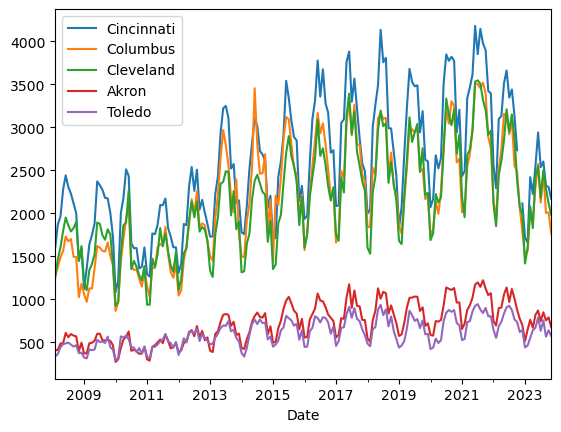

In [30]:
dates_data_t.plot()

Text(0.5, 1.0, 'Houses Sold')

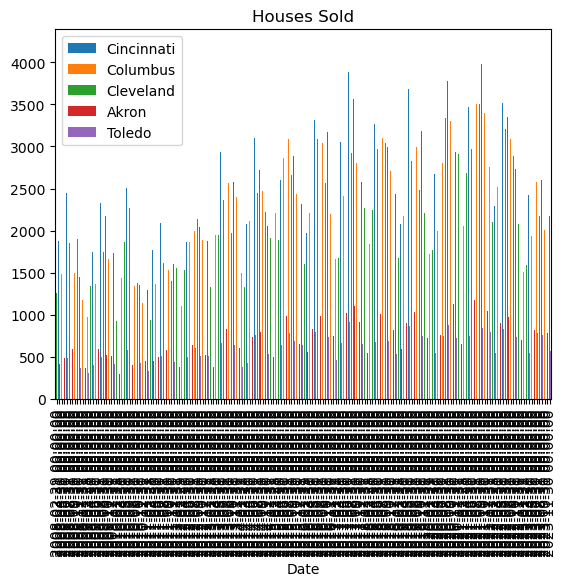

In [31]:
dates_data_t.plot(kind='bar')
plt.title("Houses Sold")
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.show

In [ ]:
## New Construction Sales Data

In [32]:
new_construction_sales.shape
display(new_construction_sales)

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
0,102001,0,United States,country,NaN,37066.0,36475.0,46872.0,41641.0,44494.0,...,24569.0,31273.0,42895.0,37818.0,42978.0,42341.0,34096.0,37166.0,33917.0,31641.0
1,394913,1,"New York, NY",msa,NY,516.0,435.0,533.0,500.0,570.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,521.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,345.0,346.0,435.0,479.0,562.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,1510.0,1637.0,2201.0,1928.0,1770.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,394548,641,"Durant, OK",msa,OK,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.0,12.0,11.0,6.0,7.0,8.0
316,394567,663,"Ellensburg, WA",msa,WA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17.0,10.0,15.0,13.0,9.0,13.0,17.0,16.0
317,394476,704,"Clewiston, FL",msa,FL,NaN,NaN,NaN,NaN,NaN,...,12.0,14.0,21.0,10.0,20.0,15.0,12.0,11.0,25.0,14.0
318,394713,768,"Jackson, WY",msa,WY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,7.0,9.0,6.0,6.0


In [34]:
new_construction_sales.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
0,102001,0,United States,country,NaN,37066.0,36475.0,46872.0,41641.0,44494.0,...,24569.0,31273.0,42895.0,37818.0,42978.0,42341.0,34096.0,37166.0,33917.0,31641.0
1,394913,1,"New York, NY",msa,NY,516.0,435.0,533.0,500.0,570.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,521.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,345.0,346.0,435.0,479.0,562.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,1510.0,1637.0,2201.0,1928.0,1770.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0


In [35]:
new_construction_sales.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '1/31/2018', '2/28/2018', '3/31/2018', '4/30/2018', '5/31/2018',
       '6/30/2018', '7/31/2018', '8/31/2018', '9/30/2018', '10/31/2018',
       '11/30/2018', '12/31/2018', '1/31/2019', '2/28/2019', '3/31/2019',
       '4/30/2019', '5/31/2019', '6/30/2019', '7/31/2019', '8/31/2019',
       '9/30/2019', '10/31/2019', '11/30/2019', '12/31/2019', '1/31/2020',
       '2/29/2020', '3/31/2020', '4/30/2020', '5/31/2020', '6/30/2020',
       '7/31/2020', '8/31/2020', '9/30/2020', '10/31/2020', '11/30/2020',
       '12/31/2020', '1/31/2021', '2/28/2021', '3/31/2021', '4/30/2021',
       '5/31/2021', '6/30/2021', '7/31/2021', '8/31/2021', '9/30/2021',
       '10/31/2021', '11/30/2021', '12/31/2021', '1/31/2022', '2/28/2022',
       '3/31/2022', '4/30/2022', '5/31/2022', '6/30/2022', '7/31/2022',
       '8/31/2022', '9/30/2022', '10/31/2022', '11/30/2022', '12/31/2022',
       '1/31/2023', '2/28/2023', '3/31/2023', '4/

In [36]:
new_construction_sales.count()

RegionID      320
SizeRank      320
RegionName    320
RegionType    320
StateName     319
             ... 
6/30/2023     287
7/31/2023     292
8/31/2023     297
9/30/2023     301
10/31/2023    318
Length: 75, dtype: int64

In [37]:
new_construction_sales.isnull().mean() * 100

RegionID       0.0000
SizeRank       0.0000
RegionName     0.0000
RegionType     0.0000
StateName      0.3125
               ...   
6/30/2023     10.3125
7/31/2023      8.7500
8/31/2023      7.1875
9/30/2023      5.9375
10/31/2023     0.6250
Length: 75, dtype: float64

In [38]:
new_construction_sales = new_construction_sales.dropna()

In [39]:
new_construction_sales.isnull().sum()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
             ..
6/30/2023     0
7/31/2023     0
8/31/2023     0
9/30/2023     0
10/31/2023    0
Length: 75, dtype: int64

In [40]:
display(new_construction_sales)
#The number of unique new construction homes that sold during the month. for the dates 

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
1,394913,1,"New York, NY",msa,NY,516.0,435.0,533.0,500.0,570.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,521.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,345.0,346.0,435.0,479.0,562.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,1510.0,1637.0,2201.0,1928.0,1770.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0
5,394692,5,"Houston, TX",msa,TX,1365.0,1679.0,1877.0,1850.0,1798.0,...,1343.0,1859.0,2328.0,1986.0,2206.0,2142.0,1701.0,1716.0,1702.0,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,394674,467,"Heber, UT",msa,UT,20.0,36.0,40.0,30.0,31.0,...,32.0,62.0,47.0,29.0,32.0,39.0,33.0,36.0,54.0,55.0
289,394298,473,"Aberdeen, WA",msa,WA,20.0,20.0,21.0,22.0,24.0,...,8.0,15.0,14.0,10.0,8.0,6.0,9.0,8.0,5.0,11.0
290,753893,477,"Jefferson, GA",msa,GA,55.0,89.0,130.0,81.0,84.0,...,63.0,79.0,118.0,99.0,105.0,104.0,92.0,67.0,77.0,93.0
303,395122,576,"St. Marys, GA",msa,GA,30.0,19.0,32.0,45.0,35.0,...,13.0,19.0,26.0,18.0,26.0,30.0,18.0,29.0,24.0,25.0


In [41]:
#multiple reg analysis, create list for dates , time series analysis (medium.com), json data format open up list copy and paste dates into it
#range function (ref data frame then select range) python

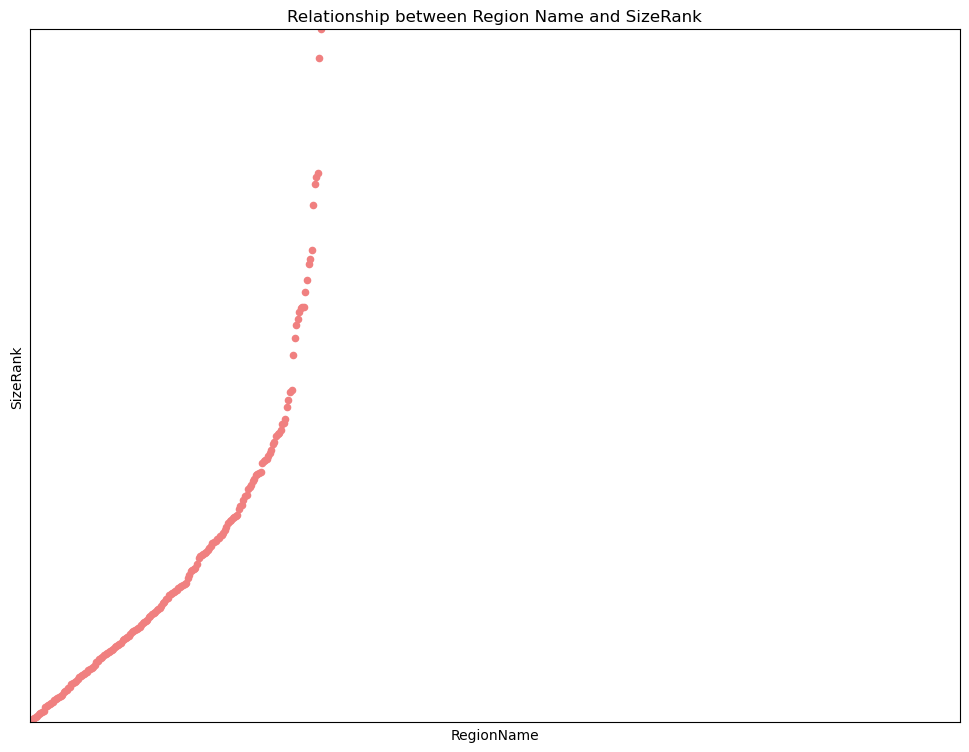

In [42]:
# Scatterplot of RegionName and dates
new_construction_sales_visual = new_construction_sales.plot.scatter(x="RegionName",y="SizeRank",title="Relationship between Region Name and SizeRank", figsize=(12,9),
                                           xlabel="RegionName",ylabel="SizeRank",color="lightcoral",
                                          xlim=(1,601),ylim=(1,601),xticks=(),yticks=())

In [43]:
display(new_construction_sales)

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
1,394913,1,"New York, NY",msa,NY,516.0,435.0,533.0,500.0,570.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,521.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,345.0,346.0,435.0,479.0,562.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,1510.0,1637.0,2201.0,1928.0,1770.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0
5,394692,5,"Houston, TX",msa,TX,1365.0,1679.0,1877.0,1850.0,1798.0,...,1343.0,1859.0,2328.0,1986.0,2206.0,2142.0,1701.0,1716.0,1702.0,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,394674,467,"Heber, UT",msa,UT,20.0,36.0,40.0,30.0,31.0,...,32.0,62.0,47.0,29.0,32.0,39.0,33.0,36.0,54.0,55.0
289,394298,473,"Aberdeen, WA",msa,WA,20.0,20.0,21.0,22.0,24.0,...,8.0,15.0,14.0,10.0,8.0,6.0,9.0,8.0,5.0,11.0
290,753893,477,"Jefferson, GA",msa,GA,55.0,89.0,130.0,81.0,84.0,...,63.0,79.0,118.0,99.0,105.0,104.0,92.0,67.0,77.0,93.0
303,395122,576,"St. Marys, GA",msa,GA,30.0,19.0,32.0,45.0,35.0,...,13.0,19.0,26.0,18.0,26.0,30.0,18.0,29.0,24.0,25.0


In [44]:
new_construction_sales_visual = new_construction_sales.drop(['RegionID','SizeRank','RegionType','StateName'], axis=1)
display(new_construction_sales_visual)

,RegionName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
1,"New York, NY",516.0,435.0,533.0,500.0,570.0,636.0,580.0,586.0,466.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,"Los Angeles, CA",418.0,430.0,668.0,499.0,521.0,562.0,498.0,564.0,384.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,"Chicago, IL",345.0,346.0,435.0,479.0,562.0,472.0,435.0,444.0,398.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,"Dallas, TX",1510.0,1637.0,2201.0,1928.0,1770.0,1470.0,1563.0,1664.0,1432.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0
5,"Houston, TX",1365.0,1679.0,1877.0,1850.0,1798.0,1612.0,1353.0,1684.0,1331.0,...,1343.0,1859.0,2328.0,1986.0,2206.0,2142.0,1701.0,1716.0,1702.0,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,"Heber, UT",20.0,36.0,40.0,30.0,31.0,24.0,24.0,27.0,29.0,...,32.0,62.0,47.0,29.0,32.0,39.0,33.0,36.0,54.0,55.0
289,"Aberdeen, WA",20.0,20.0,21.0,22.0,24.0,22.0,16.0,15.0,17.0,...,8.0,15.0,14.0,10.0,8.0,6.0,9.0,8.0,5.0,11.0
290,"Jefferson, GA",55.0,89.0,130.0,81.0,84.0,77.0,72.0,57.0,58.0,...,63.0,79.0,118.0,99.0,105.0,104.0,92.0,67.0,77.0,93.0
303,"St. Marys, GA",30.0,19.0,32.0,45.0,35.0,49.0,38.0,31.0,28.0,...,13.0,19.0,26.0,18.0,26.0,30.0,18.0,29.0,24.0,25.0


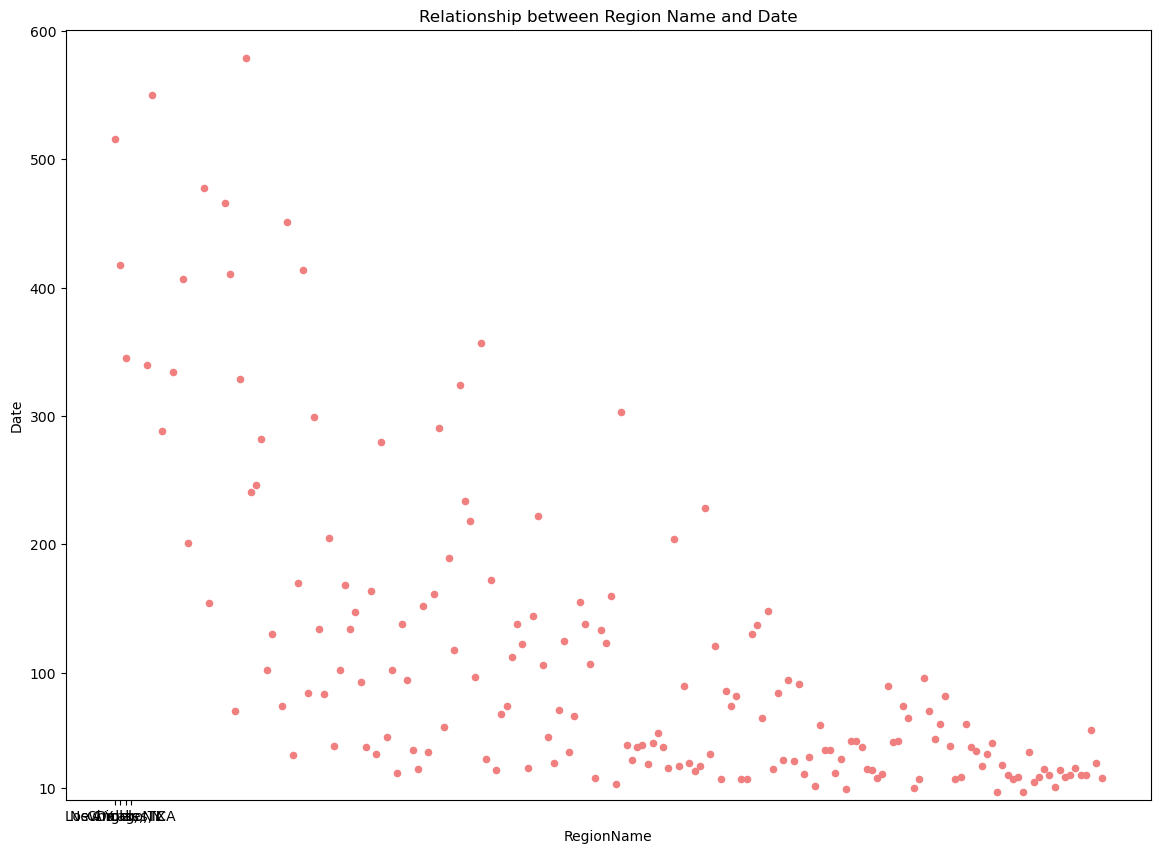

In [45]:
#do not use scatter plot (only when two continuous numbers being compaird), use box/violin plot
#number of new constructions y lable 
new_construction_sales_visual = new_construction_sales.plot.scatter(x="RegionName",y="1/31/2018",title="Relationship between Region Name and Date", figsize=(14,10),
                                           xlabel="RegionName",ylabel="Date",color="lightcoral",
                                          ylim=(1,601),xticks=("New York, NY", "Los Angeles, CA", "Chicago, IL", "Dallas, TX"),yticks=(10, 100, 200, 300, 400, 500, 600, 700, 1000))

In [46]:
display(new_construction_sales)

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
1,394913,1,"New York, NY",msa,NY,516.0,435.0,533.0,500.0,570.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,521.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,345.0,346.0,435.0,479.0,562.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,1510.0,1637.0,2201.0,1928.0,1770.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0
5,394692,5,"Houston, TX",msa,TX,1365.0,1679.0,1877.0,1850.0,1798.0,...,1343.0,1859.0,2328.0,1986.0,2206.0,2142.0,1701.0,1716.0,1702.0,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,394674,467,"Heber, UT",msa,UT,20.0,36.0,40.0,30.0,31.0,...,32.0,62.0,47.0,29.0,32.0,39.0,33.0,36.0,54.0,55.0
289,394298,473,"Aberdeen, WA",msa,WA,20.0,20.0,21.0,22.0,24.0,...,8.0,15.0,14.0,10.0,8.0,6.0,9.0,8.0,5.0,11.0
290,753893,477,"Jefferson, GA",msa,GA,55.0,89.0,130.0,81.0,84.0,...,63.0,79.0,118.0,99.0,105.0,104.0,92.0,67.0,77.0,93.0
303,395122,576,"St. Marys, GA",msa,GA,30.0,19.0,32.0,45.0,35.0,...,13.0,19.0,26.0,18.0,26.0,30.0,18.0,29.0,24.0,25.0


In [47]:
new_construction_sales = new_construction_sales[new_construction_sales['StateName'] == 'OH']
display(new_construction_sales)

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
28,394466,28,"Cincinnati, OH",msa,OH,329.0,254.0,212.0,192.0,153.0,...,124.0,127.0,183.0,137.0,179.0,141.0,159.0,131.0,118.0,96.0
32,394492,32,"Columbus, OH",msa,OH,246.0,227.0,259.0,231.0,227.0,...,119.0,156.0,270.0,215.0,233.0,201.0,128.0,199.0,167.0,201.0
34,394475,35,"Cleveland, OH",msa,OH,102.0,80.0,100.0,82.0,117.0,...,48.0,72.0,74.0,68.0,66.0,78.0,60.0,60.0,69.0,68.0
72,845158,74,"Dayton, OH",msa,OH,58.0,37.0,51.0,33.0,29.0,...,26.0,39.0,64.0,45.0,36.0,37.0,39.0,35.0,36.0,35.0
81,394304,83,"Akron, OH",msa,OH,33.0,36.0,38.0,26.0,28.0,...,7.0,18.0,10.0,24.0,23.0,22.0,15.0,14.0,22.0,15.0
90,395160,93,"Toledo, OH",msa,OH,26.0,22.0,24.0,29.0,32.0,...,16.0,11.0,21.0,15.0,11.0,25.0,16.0,14.0,21.0,22.0


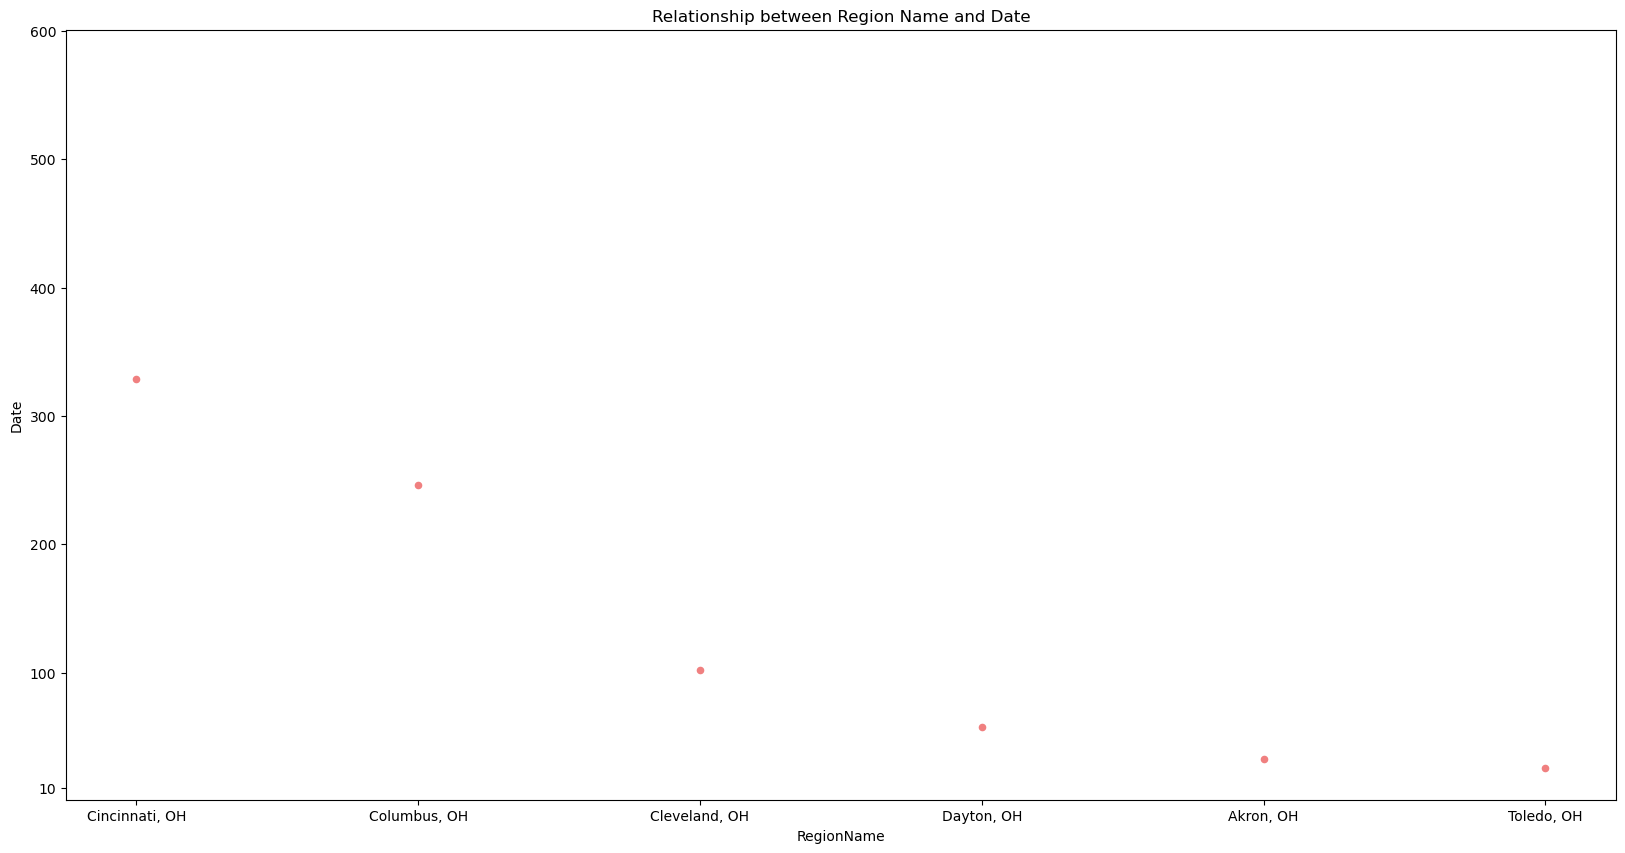

In [48]:
#pre covid post  covid, before march 2020 two agg columns use hue paramenter eto giev color to diff locations 
#bar , location is a cat 
new_construction_sales = new_construction_sales.plot.scatter(x="RegionName",y="1/31/2018",title="Relationship between Region Name and Date", figsize=(20,10),
                                           xlabel="RegionName",ylabel="Date",color="lightcoral",
                                          ylim=(1,601),xticks=("Cincinnati, OH", "Columbus, OH", "Cleveland, OH", "Dayton, OH", "Akron, OH", "Toledo, OH"),yticks=(10, 100, 200, 300, 400, 500, 600, 700, 1000))

In [50]:
display(new_construction_sales)

<Axes: title={'center': 'Relationship between Region Name and Date'}, xlabel='RegionName', ylabel='Date'>

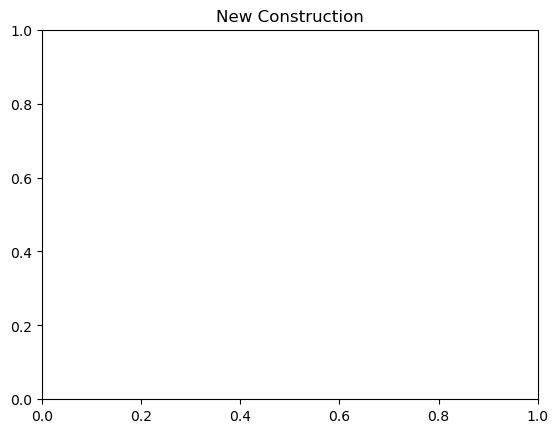

<Figure size 640x480 with 0 Axes>

In [51]:
new_construction_sales_visual.plot(kind="bar", figsize=(13,1), axis=3)

plt.title("New Construction")

plt.show()
plt.tight_layout()

In [ ]:
#new_construction_sales = new_construction_sales.loc[(new_construction_sales['StateName']=='OH')]
#new_construction_sales

In [52]:
region = new_construction_sales['RegionName']
region

TypeError: 'Axes' object is not subscriptable

In [55]:
#dropped non-numerical columns
dates = new_construction_sales.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName', 'RegionName'])
dates

AttributeError: 'Axes' object has no attribute 'drop'

In [56]:
dates.columns = pd.to_datetime(dates.columns)
dates

NameError: name 'dates' is not defined

In [57]:
dates['Date'] = ''
dates

NameError: name 'dates' is not defined

In [58]:
dates_t = dates.set_index('Date').T
dates_t

NameError: name 'dates' is not defined

In [ ]:
dates_t['Date'] = pd.to_datetime(dates_t.index)
dates_t.drop(columns='Date')
dates_t.set_index('Date', inplace=True)

In [ ]:
dates_t.resample('Y').sum()

In [ ]:
dates_t.columns = ['Cincinnati','Columbus','Cleveland','Akron','Toledo']
dates_t

In [ ]:
dates_t.plot()
plt.title("New Construction")

In [59]:
zestimate.dropna(inplace=True)

In [60]:
zestimate.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,394466,28,"Cincinnati, OH",msa,OH,123285.59080,123248.6175,123190.11390,123465.08810,123998.75980,...,256429.8895,257186.0028,258907.0016,261391.1562,263944.2553,266223.3256,267886.2660,268921.0643,269405.3712,269668.9344
1,394492,32,"Columbus, OH",msa,OH,122802.19670,122909.1501,123081.82620,123429.69540,123850.70580,...,284776.9682,285236.2615,286804.2594,288978.0312,291477.0123,293844.5102,295975.9036,297656.6676,298865.4308,299588.3884
2,394475,35,"Cleveland, OH",msa,OH,115713.93960,115883.6149,116056.98890,116418.73980,116976.62730,...,202291.0216,202583.4009,203810.8053,205405.5919,207243.7700,209038.5210,210793.6855,212232.2111,213380.3142,214136.1425
3,394304,83,"Akron, OH",msa,OH,106289.14790,106456.4836,106577.02750,106875.41180,107149.62400,...,194782.3361,195229.4814,196585.1946,198324.0854,200149.8978,201907.0226,203367.1560,204596.9838,205441.5261,206093.6075
4,395160,93,"Toledo, OH",msa,OH,83501.85695,83582.9768,83699.29069,84039.18756,84556.47498,...,165502.3824,165836.6763,167074.6010,168790.1211,170897.0878,173017.8861,174626.7266,175847.7469,176854.7346,177813.3466


In [61]:
zestimate.describe

<bound method NDFrame.describe of     RegionID  SizeRank                  RegionName RegionType StateName  \
0     394466        28              Cincinnati, OH        msa        OH   
1     394492        32                Columbus, OH        msa        OH   
2     394475        35               Cleveland, OH        msa        OH   
3     394304        83                   Akron, OH        msa        OH   
4     395160        93                  Toledo, OH        msa        OH   
5     395245       106              Youngstown, OH        msa        OH   
6     394439       137                  Canton, OH        msa        OH   
8     395221       309                Wheeling, WV        msa        OH   
9     395117       316             Springfield, OH        msa        OH   
14    394340       404               Ashtabula, OH        msa        OH   
16    395248       426              Zanesville, OH        msa        OH   
17    394465       460             Chillicothe, OH        msa     

In [62]:
zestimate.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '1/31/2000', '2/29/2000', '3/31/2000', '4/30/2000', '5/31/2000',
       ...
       '2/28/2023', '3/31/2023', '4/30/2023', '5/31/2023', '6/30/2023',
       '7/31/2023', '8/31/2023', '9/30/2023', '10/31/2023', '11/30/2023'],
      dtype='object', length=292)

In [63]:
import pandas as pd

# Assuming 'zestimate' is your DataFrame
# Replace 'zestimate' with your actual DataFrame
zestimate = pd.read_csv('./Zillow Housing Estimate Index - Sheet1.csv')  # replace 'your_file.csv' with your actual file

# Filter columns from 2023
cols_2023 = [col for col in zestimate.columns if '2023' in col]
cols = ['RegionName'] + cols_2023

# Create a new DataFrame with only the filtered columns
df_filtered = zestimate[cols]

# Calculate the mean for each city in 2023
df_filtered['Mean_2023'] = df_filtered[cols_2023].mean(axis=1)

# Print the mean values
print(df_filtered[['RegionName', 'Mean_2023']])

                    RegionName      Mean_2023
0               Cincinnati, OH  263305.138409
1                 Columbus, OH  291657.197700
2                Cleveland, OH  207579.830264
3                    Akron, OH  200133.371536
4                   Toledo, OH  171100.921282
5               Youngstown, OH  143095.933345
6                   Canton, OH  184023.719445
7               Huntington, WV  138880.634355
8                 Wheeling, WV  132205.102573
9              Springfield, OH  166914.659091
10               Mansfield, OH  161986.275973
11                 Weirton, WV  119279.330036
12                    Lima, OH  161689.499136
13                   Salem, OH  140488.626800
14               Ashtabula, OH  157913.766209
15        New Philadelphia, OH  181300.551155
16              Zanesville, OH  171604.079818
17             Chillicothe, OH  184326.868127
18                Sandusky, OH  200260.119964
19                 Findlay, OH  210528.674400
20              Portsmouth, OH  11

C:\Users\ishak\AppData\Local\Temp\ipykernel_29836\2578709015.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Mean_2023'] = df_filtered[cols_2023].mean(axis=1)


# Plotting each city

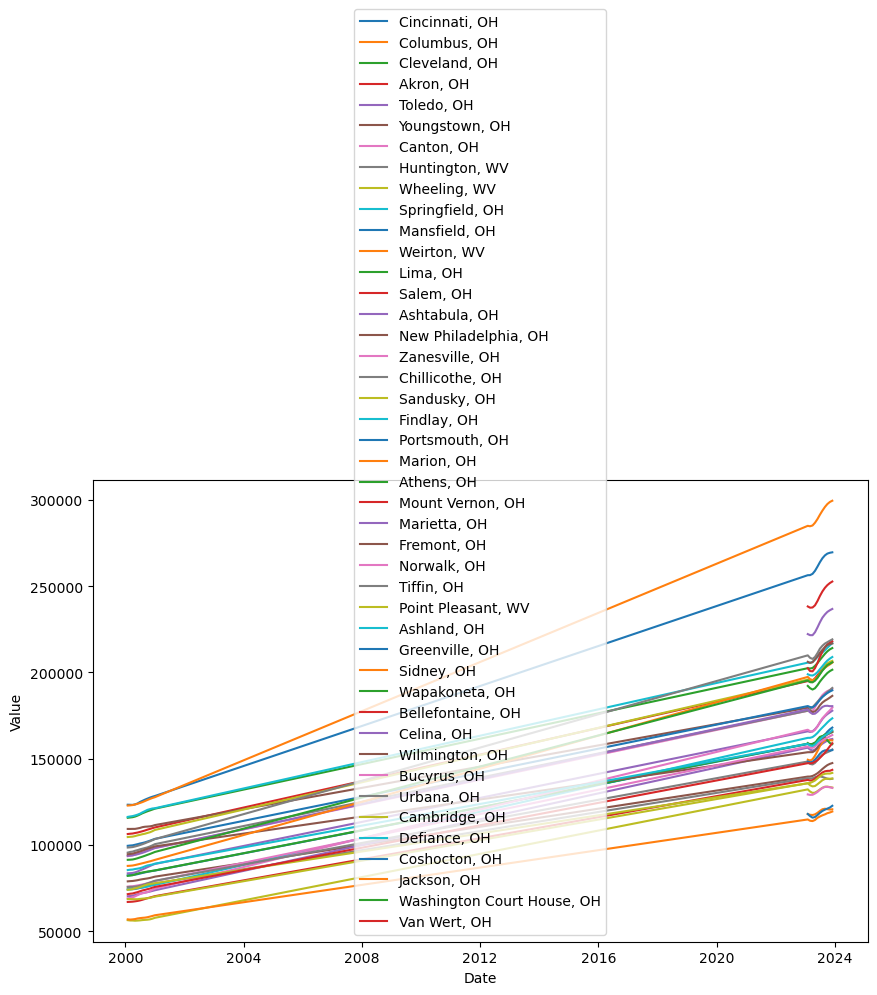

In [64]:
# Replace 'zestimate' with your actual DataFrame
zestimate = pd.read_csv('./Zillow Housing Estimate Index - Sheet1.csv')  # replace 'your_file.csv' with your actual file

# Filter columns from 2000 and 2023
cols_2000 = [col for col in zestimate.columns if '2000' in col]
cols_2023 = [col for col in zestimate.columns if '2023' in col]
cols = ['RegionName'] + cols_2000 + cols_2023

# Create a new DataFrame with only the filtered columns
df_filtered = zestimate[cols]

# Melt the DataFrame to make it suitable for plotting
df_melted = df_filtered.melt(id_vars='RegionName', var_name='Date', value_name='Value')

# Convert the 'Date' column to datetime format
df_melted['Date'] = pd.to_datetime(df_melted['Date'])

# Plot the data
plt.figure(figsize=(10, 6))
for region in df_melted['RegionName'].unique():
    data = df_melted[df_melted['RegionName'] == region]
    plt.plot(data['Date'], data['Value'], label=region)

plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [65]:
import pandas as pd

# Assuming 'zestimate' is your DataFrame
# Replace 'zestimate' with your actual DataFrame
zestimate_mean = pd.read_csv('./Zillow Housing Estimate Index - Sheet1.csv')  # replace 'your_file.csv' with your actual file

# Filter columns from 2023
cols_2023 = [col for col in zestimate.columns if '2023' in col]
cols = ['RegionName'] + cols_2023

# Create a new DataFrame with only the filtered columns
df_filtered = zestimate[cols]

# Calculate the mean for each city in 2023
df_filtered['Mean_2023'] = df_filtered[cols_2023].mean(axis=1)

# Print the mean values
print(df_filtered[['RegionName', 'Mean_2023']])

                    RegionName      Mean_2023
0               Cincinnati, OH  263305.138409
1                 Columbus, OH  291657.197700
2                Cleveland, OH  207579.830264
3                    Akron, OH  200133.371536
4                   Toledo, OH  171100.921282
5               Youngstown, OH  143095.933345
6                   Canton, OH  184023.719445
7               Huntington, WV  138880.634355
8                 Wheeling, WV  132205.102573
9              Springfield, OH  166914.659091
10               Mansfield, OH  161986.275973
11                 Weirton, WV  119279.330036
12                    Lima, OH  161689.499136
13                   Salem, OH  140488.626800
14               Ashtabula, OH  157913.766209
15        New Philadelphia, OH  181300.551155
16              Zanesville, OH  171604.079818
17             Chillicothe, OH  184326.868127
18                Sandusky, OH  200260.119964
19                 Findlay, OH  210528.674400
20              Portsmouth, OH  11

C:\Users\ishak\AppData\Local\Temp\ipykernel_29836\3204677980.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Mean_2023'] = df_filtered[cols_2023].mean(axis=1)


In [66]:
# Create a new DataFrame with the region names and their mean values
mean_df = df_filtered[['RegionName', 'Mean_2023']].copy()

# Now 'mean_df' is your new DataFrame with the mean values for each city in 2023
mean_df

,RegionName,Mean_2023
0,"Cincinnati, OH",263305.138409
1,"Columbus, OH",291657.197700
2,"Cleveland, OH",207579.830264
3,"Akron, OH",200133.371536
4,"Toledo, OH",171100.921282
5,"Youngstown, OH",143095.933345
6,"Canton, OH",184023.719445
7,"Huntington, WV",138880.634355
8,"Wheeling, WV",132205.102573
9,"Springfield, OH",166914.659091


In [67]:
mean_df

,RegionName,Mean_2023
0,"Cincinnati, OH",263305.138409
1,"Columbus, OH",291657.197700
2,"Cleveland, OH",207579.830264
3,"Akron, OH",200133.371536
4,"Toledo, OH",171100.921282
5,"Youngstown, OH",143095.933345
6,"Canton, OH",184023.719445
7,"Huntington, WV",138880.634355
8,"Wheeling, WV",132205.102573
9,"Springfield, OH",166914.659091


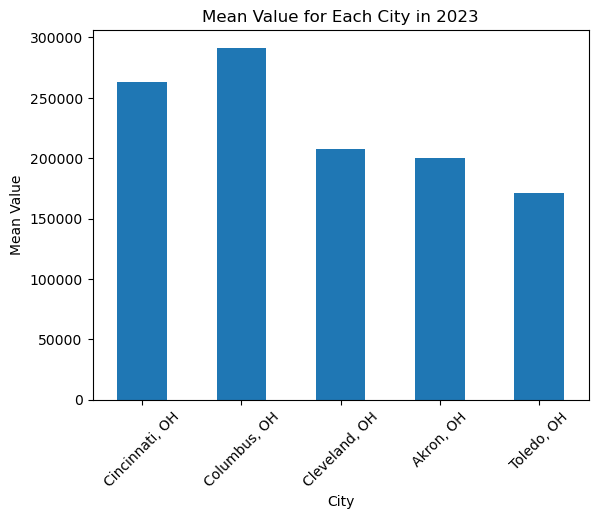

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming mean_df is your DataFrame
mean_df = pd.DataFrame({
    'RegionName': ['Cincinnati, OH', 'Columbus, OH', 'Cleveland, OH', 'Akron, OH', 'Toledo, OH'],
    'Mean_2023': [263305.138409, 291657.197700, 207579.830264, 200133.371536, 171100.921282]
})

mean_df.plot(kind='bar', x='RegionName', y='Mean_2023', legend=False)
plt.xlabel('City')
plt.ylabel('Mean Value')
plt.title('Mean Value for Each City in 2023')
plt.xticks(rotation=45)
plt.show()


# df of the mean zestimate for each city

In [69]:
zestimate

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,394466,28,"Cincinnati, OH",msa,OH,123285.59080,123248.61750,123190.11390,123465.08810,123998.75980,...,256429.8895,257186.0028,258907.0016,261391.1562,263944.2553,266223.3256,267886.2660,268921.0643,269405.3712,269668.9344
1,394492,32,"Columbus, OH",msa,OH,122802.19670,122909.15010,123081.82620,123429.69540,123850.70580,...,284776.9682,285236.2615,286804.2594,288978.0312,291477.0123,293844.5102,295975.9036,297656.6676,298865.4308,299588.3884
2,394475,35,"Cleveland, OH",msa,OH,115713.93960,115883.61490,116056.98890,116418.73980,116976.62730,...,202291.0216,202583.4009,203810.8053,205405.5919,207243.7700,209038.5210,210793.6855,212232.2111,213380.3142,214136.1425
3,394304,83,"Akron, OH",msa,OH,106289.14790,106456.48360,106577.02750,106875.41180,107149.62400,...,194782.3361,195229.4814,196585.1946,198324.0854,200149.8978,201907.0226,203367.1560,204596.9838,205441.5261,206093.6075
4,395160,93,"Toledo, OH",msa,OH,83501.85695,83582.97680,83699.29069,84039.18756,84556.47498,...,165502.3824,165836.6763,167074.6010,168790.1211,170897.0878,173017.8861,174626.7266,175847.7469,176854.7346,177813.3466
5,395245,106,"Youngstown, OH",msa,OH,78846.49968,78968.95878,79058.55618,79274.35399,79520.85261,...,139620.5781,139972.7287,140639.5712,141548.5983,142712.6911,144024.8686,145231.8579,146259.6555,146988.8720,147447.1261
6,394439,137,"Canton, OH",msa,OH,93464.88584,93713.01354,93900.38725,94322.95721,94803.08974,...,177153.4374,177742.0330,179776.9762,182366.6705,184828.8364,186837.3068,188228.8636,189179.4776,189817.6732,190550.1709
7,394697,151,"Huntington, WV",msa,OH,74249.78097,74228.28892,74289.19580,74429.67737,74720.38554,...,138506.6715,138656.7286,139241.7691,139692.7106,139740.0458,139371.4301,138920.2255,138380.4680,138134.9359,138362.9462
8,395221,309,"Wheeling, WV",msa,OH,56338.01099,56153.78340,56128.10356,56015.82486,56103.22140,...,130946.2114,130140.4508,130286.8201,131159.6922,132151.6330,133127.2428,133699.1879,133786.6503,133503.2316,133261.4540
9,395117,316,"Springfield, OH",msa,OH,74125.36499,74268.83819,74358.40482,74614.91772,74862.29840,...,162084.0043,162520.1140,163556.6362,164937.7227,166557.3155,168069.8795,169519.1880,171000.5993,172354.2430,173396.7155


# Plotting housing zestimates in 2000 vs 2023 for each city in Ohio

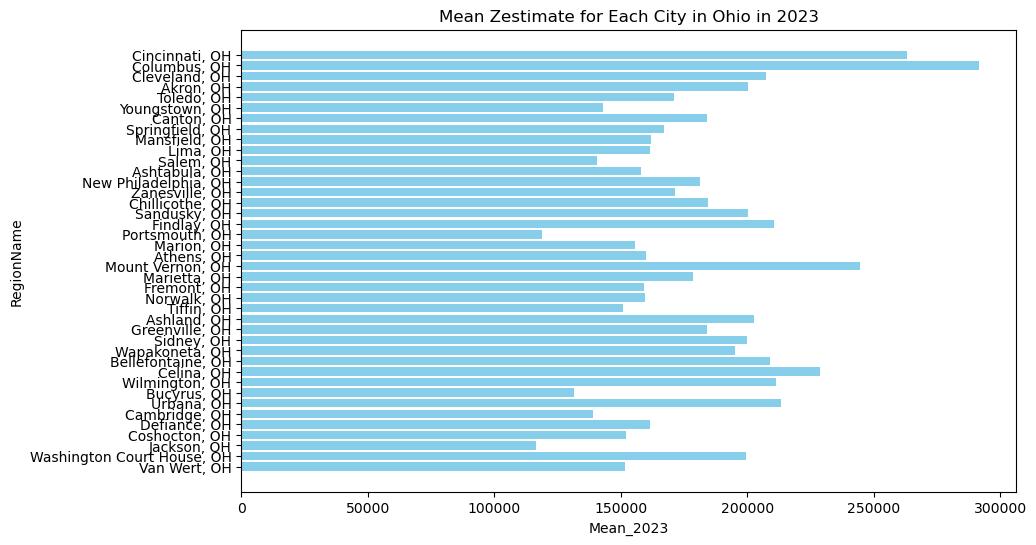

In [70]:
# Data
data = {
    'RegionName': ['Cincinnati, OH', 'Columbus, OH', 'Cleveland, OH', 'Akron, OH', 'Toledo, OH', 'Youngstown, OH', 'Canton, OH', 'Huntington, WV', 'Wheeling, WV', 'Springfield, OH', 'Mansfield, OH', 'Weirton, WV', 'Lima, OH', 'Salem, OH', 'Ashtabula, OH', 'New Philadelphia, OH', 'Zanesville, OH', 'Chillicothe, OH', 'Sandusky, OH', 'Findlay, OH', 'Portsmouth, OH', 'Marion, OH', 'Athens, OH', 'Mount Vernon, OH', 'Marietta, OH', 'Fremont, OH', 'Norwalk, OH', 'Tiffin, OH', 'Point Pleasant, WV', 'Ashland, OH', 'Greenville, OH', 'Sidney, OH', 'Wapakoneta, OH', 'Bellefontaine, OH', 'Celina, OH', 'Wilmington, OH', 'Bucyrus, OH', 'Urbana, OH', 'Cambridge, OH', 'Defiance, OH', 'Coshocton, OH', 'Jackson, OH', 'Washington Court House, OH', 'Van Wert, OH'],
    'Mean_2023': [263305.138409, 291657.197700, 207579.830264, 200133.371536, 171100.921282, 143095.933345, 184023.719445, 138880.634355, 132205.102573, 166914.659091, 161986.275973, 119279.330036, 161689.499136, 140488.626800, 157913.766209, 181300.551155, 171604.079818, 184326.868127, 200260.119964, 210528.674400, 118903.271273, 155798.867227, 160043.236936, 244497.605464, 178670.099791, 159093.650200, 159567.207145, 150751.749782, 136432.576118, 202678.053736, 184258.144655, 200018.978464, 195268.056327, 209025.609945, 228853.665545, 211180.788164, 131497.549764, 213414.454718, 139114.623236, 161362.076936, 151923.137945, 116407.309609, 199466.818136, 151535.763018]
}

# Create DataFrame
mean_df = pd.DataFrame(data)

# Filter DataFrame to only include cities in Ohio
mean_df = mean_df[mean_df['RegionName'].str.contains(', OH')]

# Plot
plt.figure(figsize=(10,6))
plt.barh(mean_df['RegionName'], mean_df['Mean_2023'], color='skyblue')
plt.xlabel('Mean_2023')
plt.ylabel('RegionName')
plt.title('Mean Zestimate for Each City in Ohio in 2023')
plt.gca().invert_yaxis()
plt.show()

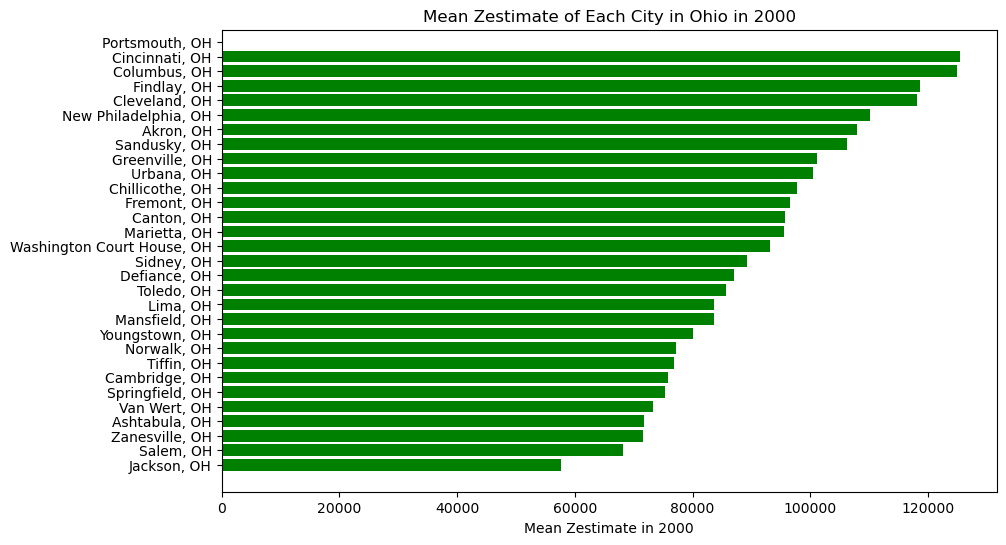

In [71]:
# Assuming 'zestimate' is your DataFrame
df_2000 = zestimate.loc[:, zestimate.columns.str.contains('2000')]  # Filter columns for the year 2000

# Calculate mean Zestimate for each city in 2000
mean_zestimate_2000 = df_2000.mean(axis=1)

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'RegionName': zestimate['RegionName'],
    'MeanZestimate2000': mean_zestimate_2000
})

# Filter DataFrame to only include cities in Ohio
plot_df = plot_df[plot_df['RegionName'].str.contains(', OH')]

# Sort values for better visualization
plot_df = plot_df.sort_values('MeanZestimate2000')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(plot_df['RegionName'], plot_df['MeanZestimate2000'], color='green')
plt.xlabel('Mean Zestimate in 2000')
plt.title('Mean Zestimate of Each City in Ohio in 2000')
plt.show()
